### Importing the dependencies

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Reading the Data

In [ ]:
df=pd.read_csv('/kaggle/input/vehicle-dataset-from-cardekho/car data.csv')

In [ ]:
df.head()

### Checking for the shape of the dataset

In [ ]:
df.shape

### Checking for Numeric and Categorical Variables

In [ ]:
df.info()

### Checking for Unique values in Seller Type,Fuel Type,Transmission,Owner Column

In [ ]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

### Checking for Null Values

In [ ]:
df.isnull().sum()

### Insights of the Data

In [ ]:
df.describe()

### The columns in the data frame

In [ ]:
df.columns

Dropping the Car Name and Creating a final dataframe

In [ ]:
final_df=df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [ ]:
final_df.head()

### Creating a new feature my eliminating Year column

In [ ]:
final_df['Current_Year']=2021

In [ ]:
final_df.head()

In [ ]:
final_df['Number_of_Years']=final_df.Current_Year-final_df.Year

In [ ]:
final_df.head()

In [ ]:
final_df.drop(['Year','Current_Year'],axis=1,inplace=True)

In [ ]:
final_df.head()

### Encoding : One Hot Encoding
One Hot Encoding is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms.<br>
For more refer: https://www.geeksforgeeks.org/python-pandas-get_dummies-method/

In [ ]:
final_df=pd.get_dummies(final_df,drop_first=True)

In [ ]:
final_df.head()

### Checking for Correleation among dependent and independent values

In [ ]:
final_df.corr()

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(final_df)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plotting a heatmap of Correleation Matrix

In [ ]:
corrmat=final_df.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Splitting the Data into dependent and independent values

In [ ]:
X=final_df.iloc[:,1:]
y=final_df.iloc[:,0]

In [ ]:
X.head()

In [ ]:
y.head()

### Importing the dependecies

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

### Getting the important features

In [ ]:
print(model.feature_importances_)

### Plotting a graph of important features

In [ ]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Splitting the data into train and  test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Importing the Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

### Hyperparameter Tunning

In [ ]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split= [2,5,10,15,200]
min_samples_leaf= [1,2,5,10]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
    }
print(random_grid)

### Building the Model

##### Credits: https://www.javatpoint.com/machine-learning-random-forest-algorithm <br>
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, "Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

The greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.

How does Random Forest algorithm work?
Random Forest works in two-phase first is to create the random forest by combining N decision tree, and second is to make predictions for each tree created in the first phase.

The Working process can be explained in the below steps and diagram:

Step-1: Select random K data points from the training set.

Step-2: Build the decision trees associated with the selected data points (Subsets).

Step-3: Choose the number N for decision trees that you want to build.

Step-4: Repeat Step 1 & 2.

Step-5: For new data points, find the predictions of each decision tree, and assign the new data points to the category that wins the majority votes.

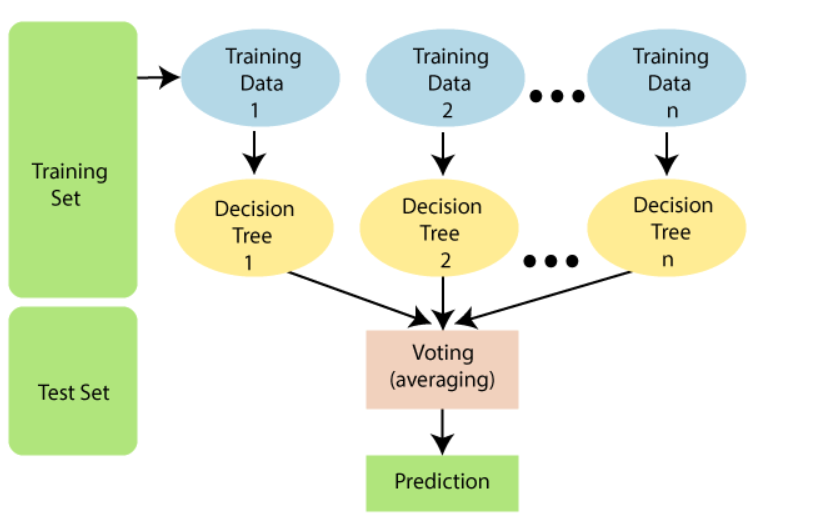

In [ ]:
rf = RandomForestRegressor()

RandomizedSearchCV solves the drawbacks of GridSearchCV, as it goes through only a fixed number of hyperparameter settings. It moves within the grid in random fashion to find the best set hyperparameters. This approach reduces unnecessary computation.
##### Credits: https://www.geeksforgeeks.org/hyperparameter-tuning/

In [ ]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
predictions=rf_random.predict(X_test)

In [ ]:
predictions

In [ ]:
sns.distplot(y_test-predictions)

In [ ]:
plt.scatter(y_test,predictions)

### Checking the Performance

In [ ]:
errors = abs(predictions - y_test)
mape = 100 * np.mean(errors / y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))